In [162]:
import os
import numpy as np
import xarray as xr
from dask.distributed import Client
import matplotlib.pyplot as plt
from os import listdir
import rioxarray as rxr
import pandas as pd
import os

In [163]:
codeDir = os.path.dirname(os.path.abspath(os.getcwd()))
parentDir = os.path.dirname(codeDir)

In [165]:
current_gages = pd.read_csv(parentDir+'\\gage_coord.csv',index_col=0)

In [164]:
gage_folder = os.path.join(parentDir,"precip_gage")

In [58]:
gage_ET = pd.read_csv(gage_folder+'\\East Troublesome\\ET Sensor Metadata.csv',index_col=0)
gage_ET = gage_ET.loc[gage_ET.Type=='rain']
gage_ET['Longitude'] = -gage_ET['Longitude']+360

In [151]:
gage_USGS = pd.read_csv(gage_folder+'\\USGS_3.csv',index_col=0)
gage_USGS['Column5'] = gage_USGS['Column5']+360
gage_USGS = gage_USGS.loc[gage_USGS['Column5']<=256]
gage_USGS = gage_USGS.rename(columns={"Column4": "latitude", "Column5": "longitude"})

In [153]:
gage_USGS = gage_USGS.reset_index()

In [154]:
# find overlapping gages
min_distance=[]
for i in gage_USGS.index:
    distance = []
    for j in current_gages.index:
        distance.append(gage_USGS.latitude[i]-current_gages.latitude[j])
    
    min_distance.append(np.min(np.abs(distance)))

In [155]:
gage_USGS['lat_dist']=min_distance

In [156]:
# find overlapping gages
min_distance=[]
for i in gage_USGS.index:
    distance = []
    for j in current_gages.index:
        distance.append(gage_USGS.longitude[i]-current_gages.longitude[j])
    
    min_distance.append(np.min(np.abs(distance)))

In [157]:
gage_USGS['lon_dist']=min_distance

In [158]:
gage_USGS=gage_USGS.loc[(gage_USGS.lat_dist.abs()>.0005)&(gage_USGS.lon_dist.abs()>.0005)]

In [136]:
# find overlapping gages
min_distance=[]
for i in gage_ET.index:
    distance = []
    for j in current_gages.index:
        distance.append(gage_ET.Latitude[i]-current_gages.latitude[j])
    
    min_distance.append(np.min(np.abs(distance)))
    
gage_ET['lat_dist']=min_distance

In [137]:
# find overlapping gages
min_distance=[]
for i in gage_ET.index:
    distance = []
    for j in current_gages.index:
        distance.append(gage_ET.Longitude[i]-current_gages.longitude[j])
    
    min_distance.append(np.min(np.abs(distance)))
    
gage_ET['lon_dist']=min_distance

In [139]:
gage_ET.loc[(gage_ET.lat_dist.abs()<.0005)&(gage_ET.lon_dist.abs()<.0005)]

,SiteID,Type,Latitude,Longitude,Elevation zone,Burn_status,Sensor_model,Sensor_install,Sensor_remove,Owner,Comments,lat_dist,lon_dist
Name,,,,,,,,,,,,,


In [159]:
# save predict
name = '\\USGS_new.csv'
output = gage_folder+name
gage_USGS.to_csv(output)

In [161]:
# save predict
name = '\\ET_meta.csv'
output = gage_folder+name
gage_ET.to_csv(output)

In [167]:
gage_ET = pd.read_csv(gage_folder+'\\ET_meta.csv',index_col=0)
gage_USGS = pd.read_csv(gage_folder+'\\USGS_new.csv',index_col=0)

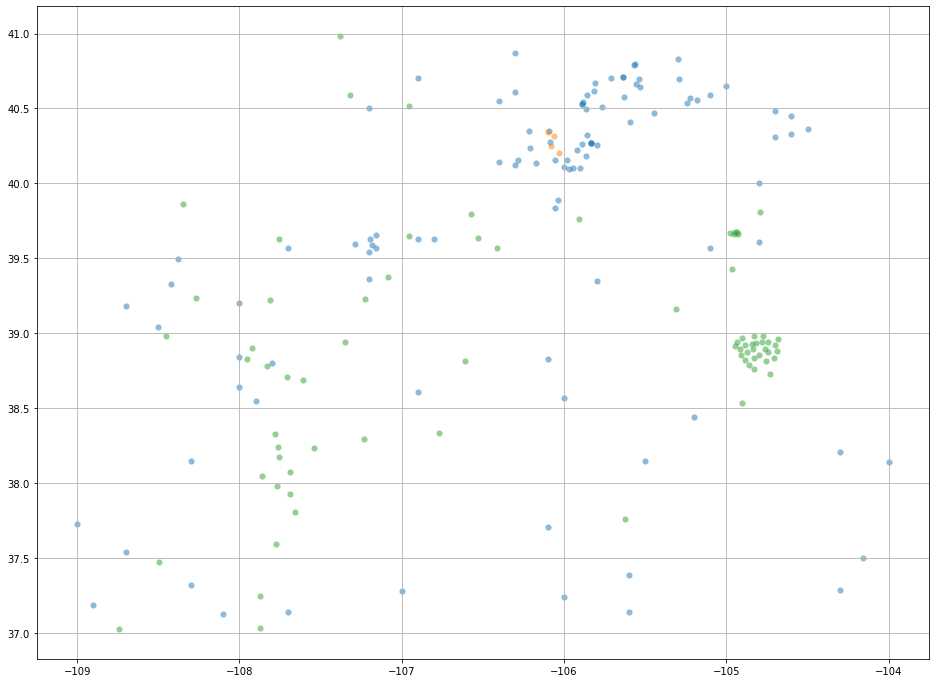

In [173]:
fig = plt.figure(1, figsize=(16, 12))
plt.scatter(current_gages.longitude-360,current_gages.latitude,alpha=.5,label='current',linewidth=.1)
plt.scatter(gage_ET.Longitude-360,gage_ET.Latitude,alpha=.5,label='ARS',linewidth=.1)
plt.scatter(gage_USGS.longitude-360,gage_USGS.latitude,alpha=.5,label='USGS',linewidth=.1)
#plt.xlim(253.8,254)
#plt.ylim(40.2,40.4)
plt.grid(True)